# `michael` needs an overhaul to allow for a flux override!

In [1]:
import sys
import lightkurve as lk
sys.path.insert(0, "../")

from michael import janet

Hi there. Welcome to the good place.


# Flux Override Example

In order to make sure `michael` works as expected, we'll want to be able to test it on data that doesn't come from the TESS mission, such as *Kepler* data we know the truth values for, or simulated data.

The `flux_override()` function lets you input a custom `time` and `flux`, and then run through the stages of `michael` manually to measure the rotation period.

This function is only intended for testing. A full-fledged expansion of `michael` to data not from `eleanor` will come at some point, hopefully!

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

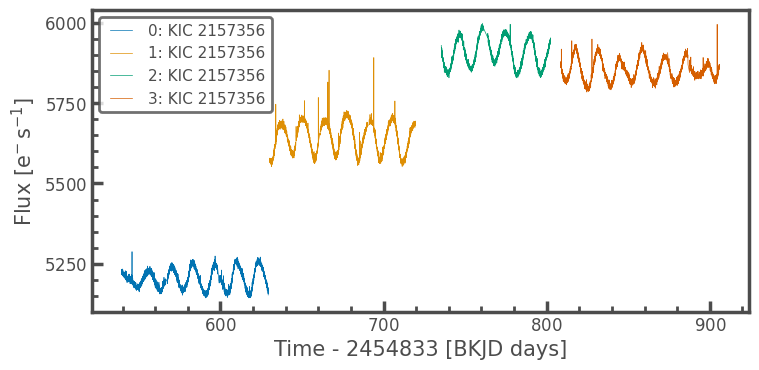

In [2]:
sr = lk.search_lightcurve('KIC 2157356')
lcc = sr[5:9].download_all()
lcc.plot()

In [3]:
n = lcc[0].normalize(unit='ppm')

In [4]:
n

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,ppm,ppm,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
539.4710179205795,1.0036891e+06,9.4026819e+02,0,3.256401e-03,334.77628,896.65861,21070,3.4558584e+03,3.3196990e+00,6.4916992e+02,2.9636624e-01,5.2211646e+03,4.8912511e+00,0,nan,nan,nan,nan,334.77628,1.3027514e-03,896.65861,1.2672400e-03,1.0354601e-01,1.7275915e-01
539.4914521464307,1.0027116e+06,9.4056976e+02,0,3.257026e-03,334.77721,896.65653,21071,3.4526921e+03,3.3196197e+00,6.4989362e+02,2.9611340e-01,5.2160796e+03,4.8928194e+00,0,nan,nan,nan,nan,334.77721,1.3066671e-03,896.65653,1.2705524e-03,1.0369641e-01,1.7259958e-01
539.5118864718097,1.0045097e+06,9.4039081e+02,0,3.257652e-03,334.77798,896.65901,21072,3.4595383e+03,3.3200655e+00,6.4979504e+02,2.9610586e-01,5.2254336e+03,4.8918886e+00,0,nan,nan,nan,nan,334.77798,1.3034944e-03,896.65901,1.2673729e-03,1.0368228e-01,1.7273143e-01
539.5323205971945,1.0059856e+06,9.4042651e+02,0,3.258277e-03,334.77601,896.65656,21073,3.4649934e+03,3.3205810e+00,6.4819775e+02,2.9631373e-01,5.2331113e+03,4.8920741e+00,0,nan,nan,nan,nan,334.77601,1.3013630e-03,896.65656,1.2657798e-03,1.0369666e-01,1.7259754e-01
539.5527548221144,1.0036908e+06,9.4040533e+02,0,3.258902e-03,334.77772,896.65665,21074,3.4567327e+03,3.3198082e+00,6.4856329e+02,2.9637170e-01,5.2211733e+03,4.8919644e+00,0,nan,nan,nan,nan,334.77772,1.3011021e-03,896.65665,1.2650627e-03,1.0375383e-01,1.7260507e-01
539.573189147035,1.0034836e+06,9.4032062e+02,0,3.259527e-03,334.77868,896.65754,21075,3.4562451e+03,3.3199708e+00,6.5004529e+02,2.9661870e-01,5.2200952e+03,4.8915234e+00,0,nan,nan,nan,nan,334.77868,1.3055945e-03,896.65754,1.2693329e-03,1.0378347e-01,1.7269596e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629.1537549556961,9.9298806e+05,9.4329529e+02,1100000000000000000,2.929536e-03,334.57094,896.36601,25459,3.5188096e+03,3.3282785e+00,6.7007190e+02,2.9775336e-01,5.1654980e+03,4.9069977e+00,1100000000000000000,nan,nan,nan,nan,334.57094,1.2897641e-03,896.36601,1.2897983e-03,-1.4263175e-01,-1.7391349e-01


/Users/Anaconda/anaconda3/lib/python3.8/site-packages/lightkurve/lightcurve.py:988: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  warnings.warn(


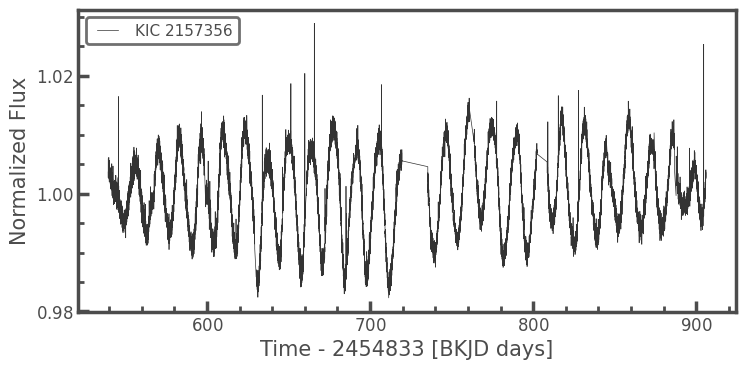

In [5]:
lc = lcc.stitch().normalize().remove_nans().remove_outliers()
lc.plot();

In [6]:
time = lc.time
flux = lc.flux

`michael` was never meant to be used with Kepler, so I'm giving it some hacky inputs.

In [7]:
j = janet(gaiaid = 'Kepler Test',
          output_path = "/Users/oliver hall/Research/unicorn/data/keplertests/")

In [8]:
j.flux_override(time, flux)

In [9]:
j.get_rotation(period_range = (5., 20.))

### Running Simple Astropy Lomb-Scargle on Sector all on star Kepler Test ###
### Completed Simple Astropy Lomb-Scargle for Sector all on star Kepler Test ###
### Saved results ###
### Running Wavelet Estimation for Sector all on star Kepler Test ###


/Users/Anaconda/anaconda3/lib/python3.8/site-packages/jazzhands/wavelets.py:488: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/219 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector all on star Kepler Test ###
### Saved results ###
### Running Composite ACF estimation for Sector all on star Kepler Test ###
### Completed Composite ACF estimation for Sector all on star Kepler Test ###
### Saved results ###
### Running ACF Estimation on star Kepler Test ###
### Completed ACF Estimation on star Kepler Test ###
### Saved results ###


In [10]:
j.validate_rotation()

### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###


../michael/plotting.py:401: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'{j.output_path}/{j.gaiaid}/output.pdf', rasterized=True)


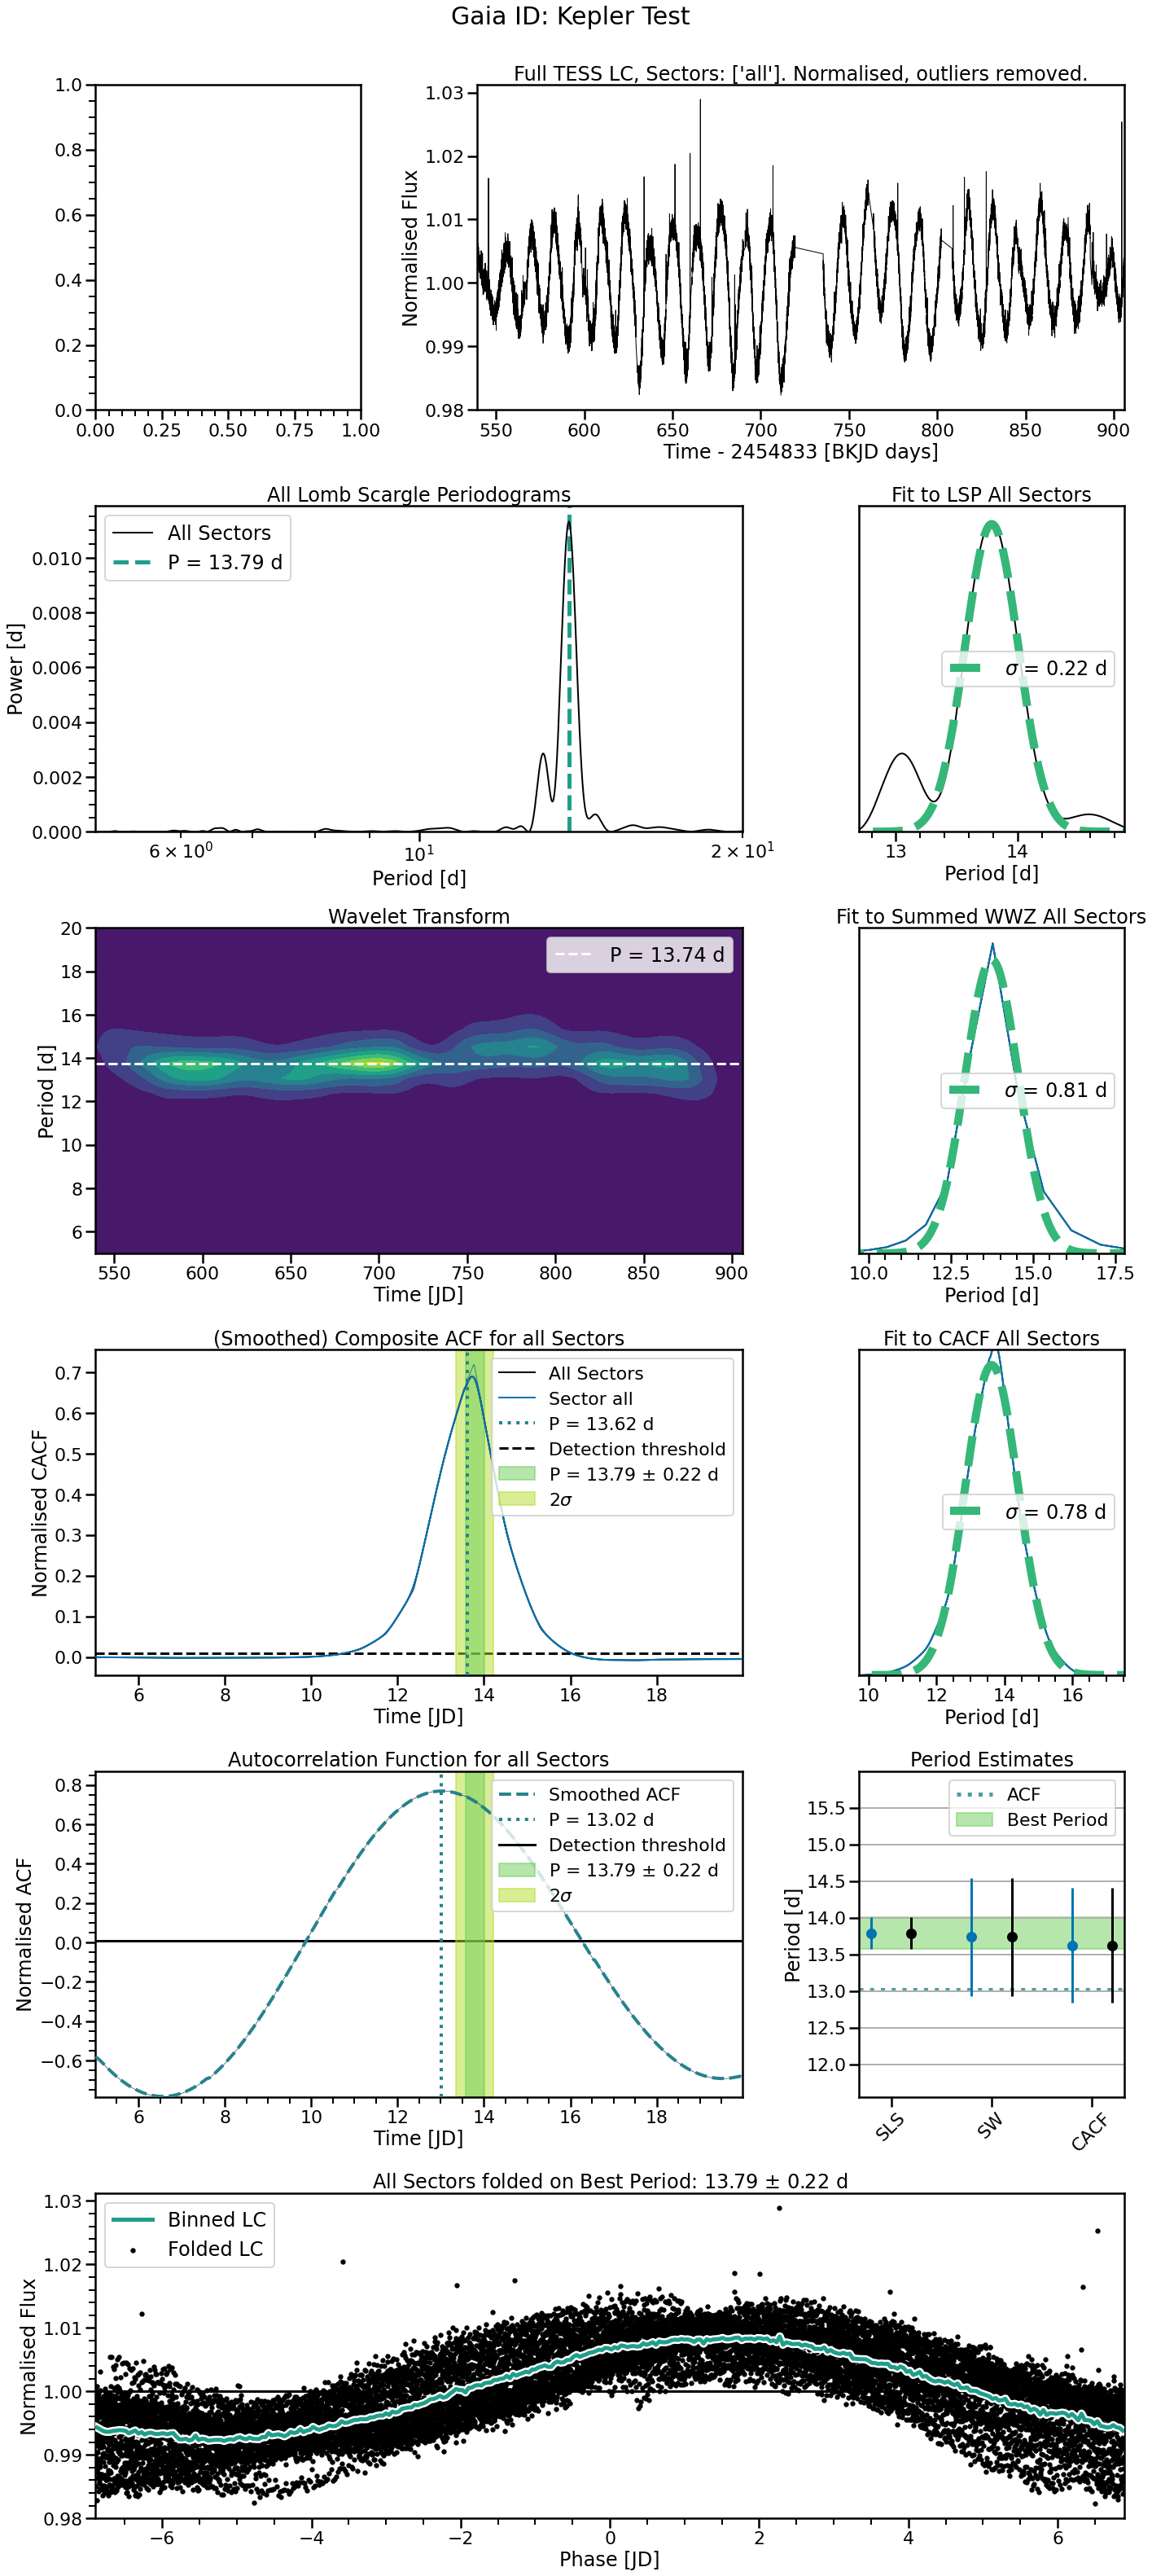

In [11]:
j.view()

In [12]:
j.results

,SLS,e_SLS,f_SLS,SW,e_SW,CACF,e_CACF,ACF,s_SLS,s_SW,s_CACF,overall,e_overall,f_overall
all,13.788358,0.218179,0.0,13.738281,0.805979,13.623291,0.780886,13.016547,NaN,NaN,NaN,NaN,NaN,NaN
best,13.788358,0.218179,0.0,13.738281,0.805979,13.623291,0.780886,NaN,all,all,all,13.788358,0.218179,129.0


In [13]:
j.decode(j.results.loc['best', 'f_overall'])


------ Decoding Overall Period Flag 129 ------
128: The ACF period does not match the 'best' period within 2 sigma.
1: Best rotation is from the Simple Lomb Scargle (SLS) method.

No other flags raised. 

